In [1]:
########## HURRICANE DORIAN DF ##########

# Version to take it from local 
import os
import pandas as pd

# Rceiving path that I have notebook in
current_dir = os.getcwd()

# Building a relative path to the file
file_path = os.path.join(current_dir, 'dorian_flore_maria_irma_harv_matt', 'hurricane_dorian_2019', 'hurricane_dorian_2019_dev.tsv')

# Check if exist because it showing some weird things
if os.path.exists(file_path):
    dorian_df = pd.read_csv(file_path, sep="\t")
    print("Succes!!")
else:
    print('No file!')

In [2]:
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import numpy as np

In [3]:
# I ask chat gpt to give me patern how I supposed to connect with server 
# Our database connection to server: 
db_url = "it's in our team group channel"

In [4]:
# Create an engine
engine = create_engine(db_url)

In [5]:
# Prepare Automap base
Base = automap_base()

In [6]:
# Reflect the tables from the database
Base.prepare(engine, reflect=True)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/2295082796.py:2: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
print("Tables:")
for table_name in Base.classes.keys():
    print(table_name)

Tables:
all_hurricanes
michael_df
cyclone_data
irma_df
hurricanes_wind
sandy_all_data
hurricane_pop_dense
harvey_df
all_hurricanes_all
dorian_tweets
florence_df
maria_df


In [8]:
# Accesing table and mapping 
dorian_df = Base.classes.dorian_tweets

In [9]:
# create session
session = Session(engine)

In [10]:
# Query the database
result = session.query(dorian_df).all()

In [11]:
# In this cell I ask chat gpt to show me how to display df after previous command. 

# "cyclone_data.__table__.columns" - this is bringing object that represents the columns in table. 
# "cyclone_data.__table__" - this is atribute that holds metadata table, also informations about columns.

columns = [column.name for column in dorian_df.__table__.columns]

# "result" - this is list of SQLAlchemy objects, that have dates taken from database.
# row.__dict__ - All object in results is representing one row. In SQLAlchemy object that represents a row have attribute "__dict__", which 
# is a dictionary that holds rows data, where keys are columns names and values are data from this columns. 

data = [row.__dict__ for row in result]

# Removing extra attributes from our dictionary. Method pop() will remove key "_sa_instance_state" and it's value from all dictionary. If key
# does not exist it won't raise error because we handle it with "None".

for row in data:
    row.pop('_sa_instance_state', None)

# Making df
dorian_df = pd.DataFrame(data, columns=columns)

In [12]:
dorian_df.head()

,tweet_id,tweet_text,class_label
0,1167956030132604928,Everywhere else during a hurricane: lets get f...,not_humanitarian
1,1168178492242051074,Hurricane #Dorian is currently over the Abaco ...,caution_and_advice
2,1168133829426655233,Terrible situation unfolding for the Bahamas. ...,other_relevant_information
3,1168287489230016513,absolutely gutted about what #HopeTown and the...,sympathy_and_support
4,1168234287478345729,Happy Dorian Eve! Prepare for the worst!,caution_and_advice


In [13]:
dorian_df = dorian_df.drop_duplicates()

In [14]:
dorian_df.dtypes

tweet_id        int64
tweet_text     object
class_label    object
dtype: object

In [15]:
dorian_df['hurricane name'] = 'Dorian'

In [16]:
dorian_df

,tweet_id,tweet_text,class_label,hurricane name
0,1167956030132604928,Everywhere else during a hurricane: lets get f...,not_humanitarian,Dorian
1,1168178492242051074,Hurricane #Dorian is currently over the Abaco ...,caution_and_advice,Dorian
2,1168133829426655233,Terrible situation unfolding for the Bahamas. ...,other_relevant_information,Dorian
3,1168287489230016513,absolutely gutted about what #HopeTown and the...,sympathy_and_support,Dorian
4,1168234287478345729,Happy Dorian Eve! Prepare for the worst!,caution_and_advice,Dorian
...,...,...,...,...
771,1167519650432860161,As we continue to prepare for Hurricane Dorian...,other_relevant_information,Dorian
772,1168247780919435267,Devastating damage in the Bahamas from @dorian...,infrastructure_and_utility_damage,Dorian
773,1167581059820601344,#Bandit says don’t worry we got cat food for H...,other_relevant_information,Dorian
774,1168319748502953985,Mandatory evacuation for the South Carolina co...,displaced_people_and_evacuations,Dorian


In [17]:
######### HURRICANE FLORENCE DF ##########

### Version to take it from local: 
current_dir = os.getcwd()

# Building a relative path to the file
file_path = os.path.join(current_dir, 'dorian_flore_maria_irma_harv_matt', 'hurricane_florence_2018', 'hurricane_florence_2018_dev.tsv')

# Check if exist
if os.path.exists(file_path):
    # Load data
    florence_df = pd.read_csv(file_path, sep="\t")
    print("File loaded successfully!")
else:
    print("File not found. Please check the path.")

In [18]:
# Version from server (I add it in one cell because I will use it many times):

engine = create_engine(db_url)

Base = automap_base()

Base.prepare(engine, reflect=True)

florence_df = Base.classes.florence_df

session = Session(engine)

result = session.query(florence_df).all()

# this place is comming from chat gpt. I ask how to bring values from tables into df when I'm opening session and query table in other notebook,
# but still I'm using that part of the code here: 

#--------------------------------------------------------------
columns = [column.name for column in florence_df.__table__.columns]
data = [row.__dict__ for row in result]

for row in data:
    row.pop('_sa_instance_state', None)
#--------------------------------------------------------------

# Here is the end. And I will use it in each places where I'm taking datas from server. 

# df
florence_df = pd.DataFrame(data, columns=columns)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/2425286081.py:7: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [19]:
florence_df.head()

,tweet_id,tweet_text,class_label
0,1041374506365837312,Were #hiring! Read about our latest #job openi...,not_humanitarian
1,1041594735654100997,I am so thankful this guy was able to rescue t...,rescue_volunteering_or_donation_effort
2,1039909240083767297,The NY-TF1 team is currently staged in Kinston...,rescue_volunteering_or_donation_effort
3,1040054715906584576,"See our latest #Utica, NY #job and click to ap...",not_humanitarian
4,1041761221333069824,FLOOD WATCH REMAINS IN EFFECT THROUGH TUESDAY ...,caution_and_advice


In [20]:
florence_df = florence_df.drop_duplicates()

In [21]:
florence_df.dtypes

tweet_id        int64
tweet_text     object
class_label    object
dtype: object

In [22]:
florence_df['hurricane name'] = 'Florence'

In [23]:
florence_df

,tweet_id,tweet_text,class_label,hurricane name
0,1041374506365837312,Were #hiring! Read about our latest #job openi...,not_humanitarian,Florence
1,1041594735654100997,I am so thankful this guy was able to rescue t...,rescue_volunteering_or_donation_effort,Florence
2,1039909240083767297,The NY-TF1 team is currently staged in Kinston...,rescue_volunteering_or_donation_effort,Florence
3,1040054715906584576,"See our latest #Utica, NY #job and click to ap...",not_humanitarian,Florence
4,1041761221333069824,FLOOD WATCH REMAINS IN EFFECT THROUGH TUESDAY ...,caution_and_advice,Florence
...,...,...,...,...
634,1041612744015929344,NEWS AROUND THE STATE for Monday Sept. 17: WIL...,injured_or_dead_people,Florence
635,1041629417842388992,How to help: Here are some of the organization...,rescue_volunteering_or_donation_effort,Florence
636,1039911759006576641,As Hurricane Florence bears down Is this your ...,caution_and_advice,Florence
637,1041690564725485569,Animal kingdom lodge is a little further from ...,not_humanitarian,Florence


In [24]:
####### HURRICANE HARVEY DF ########

# Version to take it local 
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'dorian_flore_maria_irma_harv_matt', 'hurricane_harvey_2017', 'hurricane_harvey_2017_dev.tsv')

if os.path.exists(file_path):
    harvey_df = pd.read_csv(file_path, sep="\t")
    print("Success!")

In [25]:
# Server version:
engine = create_engine(db_url)

Base = automap_base()

Base.prepare(engine, reflect=True)

harvey_df = Base.classes.harvey_df

session = Session(engine)

result = session.query(harvey_df).all()

#-------------------------------------------------------------- chat gpt : 
columns = [column.name for column in harvey_df.__table__.columns]
data = [row.__dict__ for row in result]

for row in data:
    row.pop('_sa_instance_state', None)
#-------------------------------------------------------------- chat gpt end
# df
harvey_df = pd.DataFrame(data, columns=columns)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/3914676865.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [26]:
harvey_df.head()

,tweet_id,tweet_text,class_label
0,903468169561489408,"#Harvey has so far cost at least 31 lives, for...",injured_or_dead_people
1,902836318954250240,Grandma getting evacuated on a jet ski! Humans...,displaced_people_and_evacuations
2,901722026527911936,Where are they supposed to go when their homes...,other_relevant_information
3,902897824035201025,But yalls cheeseburgers are more important,not_humanitarian
4,902750379003310080,Resources for filing flood insurance claims - ...,other_relevant_information


In [27]:
harvey_df['hurricane name'] = 'Harvey'

In [28]:
harvey_df.head()

,tweet_id,tweet_text,class_label,hurricane name
0,903468169561489408,"#Harvey has so far cost at least 31 lives, for...",injured_or_dead_people,Harvey
1,902836318954250240,Grandma getting evacuated on a jet ski! Humans...,displaced_people_and_evacuations,Harvey
2,901722026527911936,Where are they supposed to go when their homes...,other_relevant_information,Harvey
3,902897824035201025,But yalls cheeseburgers are more important,not_humanitarian,Harvey
4,902750379003310080,Resources for filing flood insurance claims - ...,other_relevant_information,Harvey


In [29]:
harvey_df = harvey_df.drop_duplicates()

In [30]:
harvey_df.dtypes

tweet_id           int64
tweet_text        object
class_label       object
hurricane name    object
dtype: object

In [31]:
####### HURRICANE IRMA DF ########

# Local version
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'dorian_flore_maria_irma_harv_matt', 'hurricane_irma_2017', 'hurricane_irma_2017_dev.tsv')

if os.path.exists(file_path):
    irma_df = pd.read_csv(file_path, sep="\t")

In [32]:
# Server version:
engine = create_engine(db_url)

Base = automap_base()

Base.prepare(engine, reflect=True)

irma_df = Base.classes.irma_df

session = Session(engine)

result = session.query(irma_df).all()
#-------------------------------------------------------------- chat gpt : 
columns = [column.name for column in irma_df.__table__.columns]
data = [row.__dict__ for row in result]

for row in data:
    row.pop('_sa_instance_state', None)
#-------------------------------------------------------------- chat gpt end
# df
irma_df = pd.DataFrame(data, columns=columns)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/1660676622.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [33]:
irma_df.head()

,tweet_id,tweet_text,class_label
0,905546682602885120,Thunderstorms over the Carson Sink will produc...,other_relevant_information
1,906446750784917504,Irma Zeroes in on Florida With $200 Billion Da...,infrastructure_and_utility_damage
2,908746423134388224,@NBCNews @MSNBC WH responds faster to incident...,other_relevant_information
3,908875806071562241,United customers &amp; employees have given $6...,rescue_volunteering_or_donation_effort
4,909416737283612672,RT @OldManRoland_: Aint nobody ask me to help ...,other_relevant_information


In [34]:
irma_df = irma_df.drop_duplicates()

In [35]:
irma_df['hurricane name'] = 'Irma'

In [36]:
irma_df.head()

,tweet_id,tweet_text,class_label,hurricane name
0,905546682602885120,Thunderstorms over the Carson Sink will produc...,other_relevant_information,Irma
1,906446750784917504,Irma Zeroes in on Florida With $200 Billion Da...,infrastructure_and_utility_damage,Irma
2,908746423134388224,@NBCNews @MSNBC WH responds faster to incident...,other_relevant_information,Irma
3,908875806071562241,United customers &amp; employees have given $6...,rescue_volunteering_or_donation_effort,Irma
4,909416737283612672,RT @OldManRoland_: Aint nobody ask me to help ...,other_relevant_information,Irma


In [37]:
irma_df.dtypes

tweet_id           int64
tweet_text        object
class_label       object
hurricane name    object
dtype: object

In [38]:
####### HURRICANE MARIA DF ########

# Local version: 
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'dorian_flore_maria_irma_harv_matt', 'hurricane_maria_2017', 'hurricane_maria_2017_dev.tsv')

if os.path.exists(file_path):
    maria_df = pd.read_csv(file_path, sep="\t")

In [39]:
# Server version:
engine = create_engine(db_url)

Base = automap_base()

Base.prepare(engine, reflect=True)

maria_df = Base.classes.maria_df

session = Session(engine)

result = session.query(maria_df).all()

#-------------------------------------------------------------- chat gpt : 

columns = [column.name for column in maria_df.__table__.columns]
data = [row.__dict__ for row in result]

for row in data:
    row.pop('_sa_instance_state', None)
#-------------------------------------------------------------- chat gpt end

# df
maria_df = pd.DataFrame(data, columns=columns)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/1787198180.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [40]:
maria_df.head()

,tweet_id,tweet_text,class_label
0,913755179157217280,"San Juan Mayor: Dammit, this is not a good new...",not_humanitarian
1,912970846200848384,Tropical Storm Maria Potential Storm Surge Flo...,other_relevant_information
2,913377662847954944,"10/ there haven’t had water, power or cell ser...",infrastructure_and_utility_damage
3,914367996453441537,@mybrandonboyd what about my tiny island of Do...,infrastructure_and_utility_damage
4,914133763961081856,Center for investigative journalism says the P...,injured_or_dead_people


In [41]:
maria_df = maria_df.drop_duplicates()

In [42]:
maria_df['hurricane name'] = 'Maria'

In [43]:
maria_df.dtypes

tweet_id           int64
tweet_text        object
class_label       object
hurricane name    object
dtype: object

In [44]:
maria_df.head()

,tweet_id,tweet_text,class_label,hurricane name
0,913755179157217280,"San Juan Mayor: Dammit, this is not a good new...",not_humanitarian,Maria
1,912970846200848384,Tropical Storm Maria Potential Storm Surge Flo...,other_relevant_information,Maria
2,913377662847954944,"10/ there haven’t had water, power or cell ser...",infrastructure_and_utility_damage,Maria
3,914367996453441537,@mybrandonboyd what about my tiny island of Do...,infrastructure_and_utility_damage,Maria
4,914133763961081856,Center for investigative journalism says the P...,injured_or_dead_people,Maria


In [45]:
####### HURRICANE SANDY DF ########

# Local v:
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'Sandy', 'sandy_all_data.csv')

if os.path.exists(file_path):
    sandy_df = pd.read_csv(file_path)


In [46]:
# Server version:
engine = create_engine(db_url)

Base = automap_base()

Base.prepare(engine, reflect=True)

sandy_df = Base.classes.sandy_all_data

session = Session(engine)

result = session.query(sandy_df).all()

#-------------------------------------------------------------- chat gpt : 

columns = [column.name for column in sandy_df.__table__.columns]
data = [row.__dict__ for row in result]

for row in data:
    row.pop('_sa_instance_state', None)
#-------------------------------------------------------------- chat gpt end

# df
sandy_df = pd.DataFrame(data, columns=columns)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/106097236.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [47]:
sandy_df.head()

,_unit_id,_golden,tweet
0,221934923,True,RT @TheHolyKaron: ......................Ã¤Ã³Ã¬...
1,221934924,True,At least 39 dead millions without power in San...
2,221934925,True,Clearly no one wants to look good for sandy la...
3,221934926,True,RT @ImJay_wbu: Hurricane #Sandy hits the Statu...
4,221934927,False,RT @NASA: Watch Hurricane #Sandy prowling the ...


In [48]:
sandy_df = sandy_df.drop_duplicates()

In [49]:
sandy_df

,_unit_id,_golden,tweet
0,221934923,True,RT @TheHolyKaron: ......................Ã¤Ã³Ã¬...
1,221934924,True,At least 39 dead millions without power in San...
2,221934925,True,Clearly no one wants to look good for sandy la...
3,221934926,True,RT @ImJay_wbu: Hurricane #Sandy hits the Statu...
4,221934927,False,RT @NASA: Watch Hurricane #Sandy prowling the ...
...,...,...,...
4536,240633403,False,RT @redheadlefthand: The latest info on transp...
4537,240633404,False,RT @donaldrwinslow: Bloomberg says at least 10...
4538,240633405,False,Hurricane Sandy: Latest Updates http://t.co/QH...
4539,240633406,False,More than 760000 Con Ed customers in NYC still...


In [50]:
sandy_df.columns

Index(['_unit_id', '_golden', 'tweet'], dtype='object')

In [51]:
sandy_df.loc[:, 'hurricane name'] = 'Sandy'

In [52]:
sandy_df.dtypes

_unit_id           int64
_golden             bool
tweet             object
hurricane name    object
dtype: object

In [53]:
sandy_df = sandy_df[['tweet', 'hurricane name']]

In [54]:
sandy_df.dtypes

tweet             object
hurricane name    object
dtype: object

In [55]:
######## HURRICANE MICHAEL DF ########

# Local v:
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'Michael', 'hurricane_michael.csv')
if os.path.exists(file_path):
    michael_df = pd.read_csv(file_path)


In [56]:
# Server version:
engine = create_engine(db_url)

Base = automap_base()

Base.prepare(engine, reflect=True)

michael_df = Base.classes.michael_df

session = Session(engine)

result = session.query(michael_df).all()

#-------------------------------------------------------------- chat gpt : 

columns = [column.name for column in michael_df.__table__.columns]
data = [row.__dict__ for row in result]

for row in data:
    row.pop('_sa_instance_state', None)
#-------------------------------------------------------------- chat gpt end

# df
michael_df = pd.DataFrame(data, columns=columns)

/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_32605/624584390.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [57]:
michael_df.columns

Index(['tweet_id', 'tweet', 'user_id'], dtype='object')

In [58]:
michael_df.head()

,tweet_id,tweet,user_id
0,1050000000000000000,Hurricane warning issued for the Gulf Coast ht...,935000000000000000
1,1050000000000000000,Pets rescued from Hurricane Michael arrive in ...,22979389
2,1050000000000000000,@abparrish083 I’m under hurricane warning.,274501601
3,1050000000000000000,Man accused of raping deaf woman who gave him ...,239378797
4,1060000000000000000,Florida Man Accused of Molesting Girl at Hurri...,37007782


In [59]:
michael_df = michael_df.drop_duplicates()

In [60]:
michael_df = michael_df.rename(columns={'Tweet': 'tweet'})

In [61]:
michael_df.head()

,tweet_id,tweet,user_id
0,1050000000000000000,Hurricane warning issued for the Gulf Coast ht...,935000000000000000
1,1050000000000000000,Pets rescued from Hurricane Michael arrive in ...,22979389
2,1050000000000000000,@abparrish083 I’m under hurricane warning.,274501601
3,1050000000000000000,Man accused of raping deaf woman who gave him ...,239378797
4,1060000000000000000,Florida Man Accused of Molesting Girl at Hurri...,37007782


In [62]:
######################### COMBINiNG HURRICANES TOGETHER ################################

In [63]:
dorflor_df = pd.concat([dorian_df, florence_df], ignore_index=True)

In [64]:
dorflor_df.head()

,tweet_id,tweet_text,class_label,hurricane name
0,1167956030132604928,Everywhere else during a hurricane: lets get f...,not_humanitarian,Dorian
1,1168178492242051074,Hurricane #Dorian is currently over the Abaco ...,caution_and_advice,Dorian
2,1168133829426655233,Terrible situation unfolding for the Bahamas. ...,other_relevant_information,Dorian
3,1168287489230016513,absolutely gutted about what #HopeTown and the...,sympathy_and_support,Dorian
4,1168234287478345729,Happy Dorian Eve! Prepare for the worst!,caution_and_advice,Dorian


In [65]:
dorflor_df.shape

(1415, 4)

In [66]:
dorflorhar_df = pd.concat([dorflor_df, harvey_df], ignore_index=True)

In [67]:
dorflorhar_df.shape

(2344, 4)

In [68]:
dor_flor_har_irm_df = pd.concat([dorflorhar_df, irma_df], ignore_index=True)

In [69]:
dor_flor_har_irm_df.shape

(3302, 4)

In [70]:
dor_flor_har_irm_mari_df = pd.concat([dor_flor_har_irm_df, maria_df], ignore_index=True)

In [71]:
dor_flor_har_irm_mari_df.shape

(4044, 4)

In [72]:
dor_flor_har_irm_mari_df.columns

Index(['tweet_id', 'tweet_text', 'class_label', 'hurricane name'], dtype='object')

In [73]:
dor_flor_har_irm_mari_df = dor_flor_har_irm_mari_df[['hurricane name', 'tweet_text']]
dor_flor_har_irm_mari_df.dtypes

hurricane name    object
tweet_text        object
dtype: object

In [74]:
dor_flor_har_irm_mari_df = dor_flor_har_irm_mari_df.rename(columns={'tweet_text': 'tweet'})

In [75]:
dor_flor_har_irm_mari_sand_df = pd.concat([dor_flor_har_irm_mari_df, sandy_df], ignore_index=True)
dor_flor_har_irm_mari_sand_df.shape

(8585, 2)

In [76]:
dor_flor_har_irm_mari_sand_df.head()

,hurricane name,tweet
0,Dorian,Everywhere else during a hurricane: lets get f...
1,Dorian,Hurricane #Dorian is currently over the Abaco ...
2,Dorian,Terrible situation unfolding for the Bahamas. ...
3,Dorian,absolutely gutted about what #HopeTown and the...
4,Dorian,Happy Dorian Eve! Prepare for the worst!


In [77]:
michael_df.shape

(3743, 3)

In [78]:
michael_df.head()

,tweet_id,tweet,user_id
0,1050000000000000000,Hurricane warning issued for the Gulf Coast ht...,935000000000000000
1,1050000000000000000,Pets rescued from Hurricane Michael arrive in ...,22979389
2,1050000000000000000,@abparrish083 I’m under hurricane warning.,274501601
3,1050000000000000000,Man accused of raping deaf woman who gave him ...,239378797
4,1060000000000000000,Florida Man Accused of Molesting Girl at Hurri...,37007782


In [79]:
michael_df.loc[:, 'hurricane name'] = 'Michael'
michael_df.head()

,tweet_id,tweet,user_id,hurricane name
0,1050000000000000000,Hurricane warning issued for the Gulf Coast ht...,935000000000000000,Michael
1,1050000000000000000,Pets rescued from Hurricane Michael arrive in ...,22979389,Michael
2,1050000000000000000,@abparrish083 I’m under hurricane warning.,274501601,Michael
3,1050000000000000000,Man accused of raping deaf woman who gave him ...,239378797,Michael
4,1060000000000000000,Florida Man Accused of Molesting Girl at Hurri...,37007782,Michael


In [80]:
michael_df = michael_df[['hurricane name', 'tweet']]
michael_df.head()

,hurricane name,tweet
0,Michael,Hurricane warning issued for the Gulf Coast ht...
1,Michael,Pets rescued from Hurricane Michael arrive in ...
2,Michael,@abparrish083 I’m under hurricane warning.
3,Michael,Man accused of raping deaf woman who gave him ...
4,Michael,Florida Man Accused of Molesting Girl at Hurri...


In [81]:
michael_df.dtypes

hurricane name    object
tweet             object
dtype: object

In [82]:
dor_flor_har_irm_mari_sand_df.dtypes

hurricane name    object
tweet             object
dtype: object

In [83]:
all_hurricanes = pd.concat([dor_flor_har_irm_mari_sand_df, michael_df], ignore_index = True)

In [84]:
all_hurricanes

,hurricane name,tweet
0,Dorian,Everywhere else during a hurricane: lets get f...
1,Dorian,Hurricane #Dorian is currently over the Abaco ...
2,Dorian,Terrible situation unfolding for the Bahamas. ...
3,Dorian,absolutely gutted about what #HopeTown and the...
4,Dorian,Happy Dorian Eve! Prepare for the worst!
...,...,...
12323,Michael,A Fighter Jet Flipped. Hangars Shredded. At Ty...
12324,Michael,President Trump provides an update on the resp...
12325,Michael,Just announced: The Walt Disney Company donate...
12326,Michael,Take a second today to say a prayer for everyo...


In [85]:
all_hurricanes['index_column'] = all_hurricanes.index
all_hurricanes

,hurricane name,tweet,index_column
0,Dorian,Everywhere else during a hurricane: lets get f...,0
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2
3,Dorian,absolutely gutted about what #HopeTown and the...,3
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4
...,...,...,...
12323,Michael,A Fighter Jet Flipped. Hangars Shredded. At Ty...,12323
12324,Michael,President Trump provides an update on the resp...,12324
12325,Michael,Just announced: The Walt Disney Company donate...,12325
12326,Michael,Take a second today to say a prayer for everyo...,12326


In [86]:
all_hurricanes.to_csv('all_hurricanes.csv', index=False)

In [87]:
all_hurricanes.dtypes

hurricane name    object
tweet             object
index_column       int64
dtype: object

Categorization based on damage costs:

Harvey ($125 billion)
Maria ($90 billion)
Sandy ($70 billion)
Irma ($50 billion)
Michael ($25 billion)
Florence ($24 billion)
Dorian ($7-10 billion)

Hurricanes Sorted by Strength:
(Saffir-Simpson Hurricane Wind Scale)

Hurricane Maria (2017) – Category 5 (157 mph / 252 km/h)
Hurricane Irma (2017) – Category 5 (185 mph / 298 km/h)
Hurricane Dorian (2019) – Category 5 (185 mph / 298 km/h)
Hurricane Michael (2018) – Category 5 (160 mph / 257 km/h)
Hurricane Harvey (2017) – Category 4 (130 mph / 209 km/h)
Hurricane Florence (2018) – Category 1 (90 mph / 145 km/h)
Hurricane Sandy (2012) – Category 1 (80 mph / 130 km/h)

Categorization based on the number of fatalities:

Maria (~3,000 deaths)
Sandy (~233 deaths)
Irma (~134 deaths)
Harvey (~107 deaths)
Dorian (~74 deaths)
Florence (~53 deaths)
Michael (~43 deaths)

In [88]:
########### I will use Hurricanes Sorted by Strength and see what we will receive ##############

In [89]:
all_hurricost = all_hurricanes.copy() #### this will be to work later and divide it by demage ####

In [90]:
all_hurrifatal = all_hurricanes.copy() #### this is for later to work with fatalities ####

In [91]:
all_hurrself = all_hurricanes.copy()   #### this is for later to check hurricanes individually ####

In [92]:
strength_label = {
    "Maria": 5,
    "Irma": 5,
    "Dorian": 5,
    "Michael": 5,
    "Harvey": 4,
    "Florence": 1,
    "Sandy": 1
}
all_hurricanes['hurricane strength'] = all_hurricanes['hurricane name'].map(strength_label)
all_hurricanes

,hurricane name,tweet,index_column,hurricane strength
0,Dorian,Everywhere else during a hurricane: lets get f...,0,5
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1,5
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2,5
3,Dorian,absolutely gutted about what #HopeTown and the...,3,5
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4,5
...,...,...,...,...
12323,Michael,A Fighter Jet Flipped. Hangars Shredded. At Ty...,12323,5
12324,Michael,President Trump provides an update on the resp...,12324,5
12325,Michael,Just announced: The Walt Disney Company donate...,12325,5
12326,Michael,Take a second today to say a prayer for everyo...,12326,5


In [93]:
all_hurricanes.dtypes

hurricane name        object
tweet                 object
index_column           int64
hurricane strength     int64
dtype: object

In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [95]:
# download dict
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aleksandrakrysiuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [96]:
# initializing sentiment analyzer: 
sia = SentimentIntensityAnalyzer()

In [97]:
## function to analyze sentiment
def vader_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [98]:
# use function on tweet column:
all_hurricanes['vader_sentiment'] = all_hurricanes['tweet'].apply(vader_sentiment)

In [99]:
#values ranging from -1 to 1. Positive scores indicate a more positive sentiment, while negative scores reflect a more negative sentiment
all_hurricanes[['tweet', 'vader_sentiment']].head()

,tweet,vader_sentiment
0,Everywhere else during a hurricane: lets get f...,0.0000
1,Hurricane #Dorian is currently over the Abaco ...,0.4754
2,Terrible situation unfolding for the Bahamas. ...,-0.3818
3,absolutely gutted about what #HopeTown and the...,-0.1779
4,Happy Dorian Eve! Prepare for the worst!,-0.2462


In [100]:
# make a function to classify sentiment : 
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [101]:
all_hurricanes['sentiment'] = all_hurricanes['vader_sentiment'].apply(classify_sentiment)
all_hurricanes[['tweet', 'vader_sentiment', 'sentiment']].head()

,tweet,vader_sentiment,sentiment
0,Everywhere else during a hurricane: lets get f...,0.0000,Neutral
1,Hurricane #Dorian is currently over the Abaco ...,0.4754,Positive
2,Terrible situation unfolding for the Bahamas. ...,-0.3818,Negative
3,absolutely gutted about what #HopeTown and the...,-0.1779,Negative
4,Happy Dorian Eve! Prepare for the worst!,-0.2462,Negative


In [102]:
positive_tweets = all_hurricanes[all_hurricanes['sentiment'] == 'Positive']
negative_tweets = all_hurricanes[all_hurricanes['sentiment'] == 'Negative']
neutral_tweets = all_hurricanes[all_hurricanes['sentiment'] == 'Neutral']

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

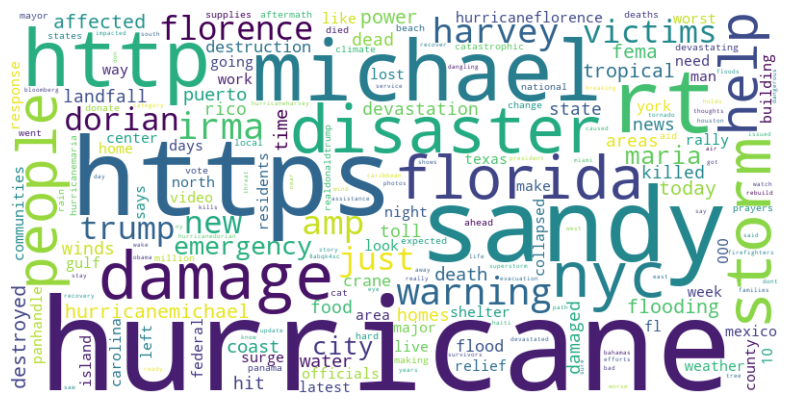

In [104]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X = vectorizer.fit_transform(negative_tweets['tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X = vectorizer.fit_transform(negative_tweets['tweet'])

word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

word_freq_dict = dict(zip(words, word_freq))

# I check how to sort this in chat gpt and later I'm also using this: 

sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

top_n = 10
top_words = sorted_word_freq[:top_n]

for word, freq in top_words:
    print(f"{word}: {freq}")

hurricane: 2392
https: 1631
sandy: 1494
rt: 1067
michael: 960
http: 859
disaster: 564
damage: 559
nyc: 531
storm: 525


In [106]:
# I'm spliting all hurricanes to compare sentiment in 'hurricane strength' 1 to 5 

In [107]:
strength_5 = all_hurricanes[all_hurricanes['hurricane strength'] == 5]

strength_1 = all_hurricanes[all_hurricanes['hurricane strength'] == 1]

In [108]:
# Checking mean sentiment for hurricanes with strength 5:
average_sentiment_5 = strength_5['vader_sentiment'].mean()
average_sentiment_5 

-0.014829940504904328

In [109]:
# Checking mean sentiment for hurricanes with strength 1:
average_sentiment_1 = strength_1['vader_sentiment'].mean()
average_sentiment_1

-0.012405675675675671

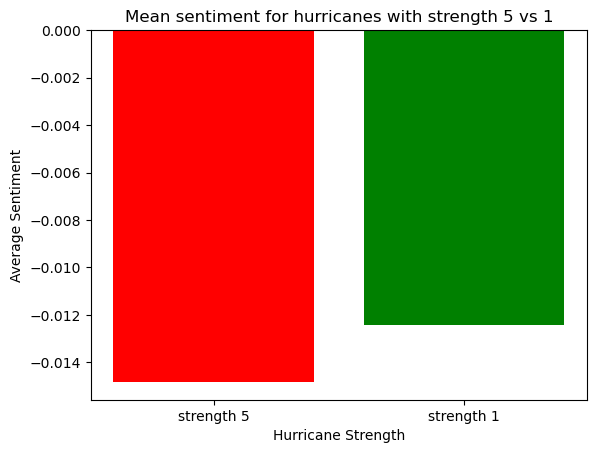

In [110]:
# This visualization here is different in this notebook then in the other one, bacause in the other one I was combining datasets with inner, 
# so not all hurricanes are there! 
# making some visualization:
import matplotlib.pyplot as plt

categories = ['strength 5', 'strength 1']
sentiments = [average_sentiment_5, average_sentiment_1]

plt.bar(categories, sentiments, color=['red', 'green'])

plt.title('Mean sentiment for hurricanes with strength 5 vs 1')
plt.xlabel('Hurricane Strength')
plt.ylabel('Average Sentiment')

plt.show()

In [111]:
# Filter for negative sentiment:
negative_strength_5 = strength_5[strength_5['vader_sentiment'] < 0]
negative_strength_1 = strength_1[strength_1['vader_sentiment'] < 0]

In [113]:
# I have to make my own stop words, internet words + hurricane names

my_stop_words = ["rt", "http", "https", "hurricane", "michael", "harvey", "sandy", "florence", "irma", "maria", "dorian", "amp", 
                  "tropical", "storm", "hurricanemichael", "hurricaneharvey", "hurricaneflorence", "hurricanesandy", "hurricaneirma", 
                 "hurricanedorian", "hurricanemaria", "panama", "mexico", "new", "houston", 'ã³â', "tx",
                 "jersey", "york", "florida", "carolina", "carolinas", "nyc", "texas", "nc", "_ã", "ā³â"]

In [114]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # english stop words

combined_stop_words = list(ENGLISH_STOP_WORDS) + my_stop_words

vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=combined_stop_words)  # Passing combined stopwords list
X = vectorizer.fit_transform(negative_tweets['tweet'])

word_freq = X.sum(axis=0).A1  # sum word occurrences
words = vectorizer.get_feature_names_out()

word_freq_dict = dict(zip(words, word_freq))

sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Show top 20
sorted_word_freq[:20]

[('disaster', 564),
 ('damage', 559),
 ('people', 389),
 ('help', 342),
 ('warning', 316),
 ('victims', 222),
 ('just', 218),
 ('trump', 218),
 ('emergency', 216),
 ('city', 205),
 ('power', 195),
 ('today', 190),
 ('flooding', 185),
 ('affected', 183),
 ('fema', 181),
 ('destroyed', 179),
 ('death', 170),
 ('water', 170),
 ('time', 168),
 ('puerto', 162)]

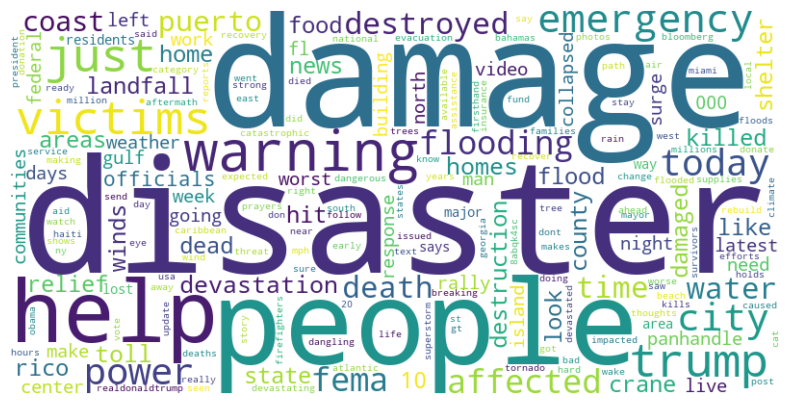

In [117]:
# cloud for most popular negative tweets without stop words and hiurricane names

vectorizer = CountVectorizer(stop_words=combined_stop_words)
X = vectorizer.fit_transform(negative_tweets['tweet'])

word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

word_freq_dict = dict(zip(words, word_freq))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [118]:
# pip install ipympl (to be able to zoom tree but it doeasn't seem to be working like this :/ #

Mean Squared Error: 0.10647519525840092


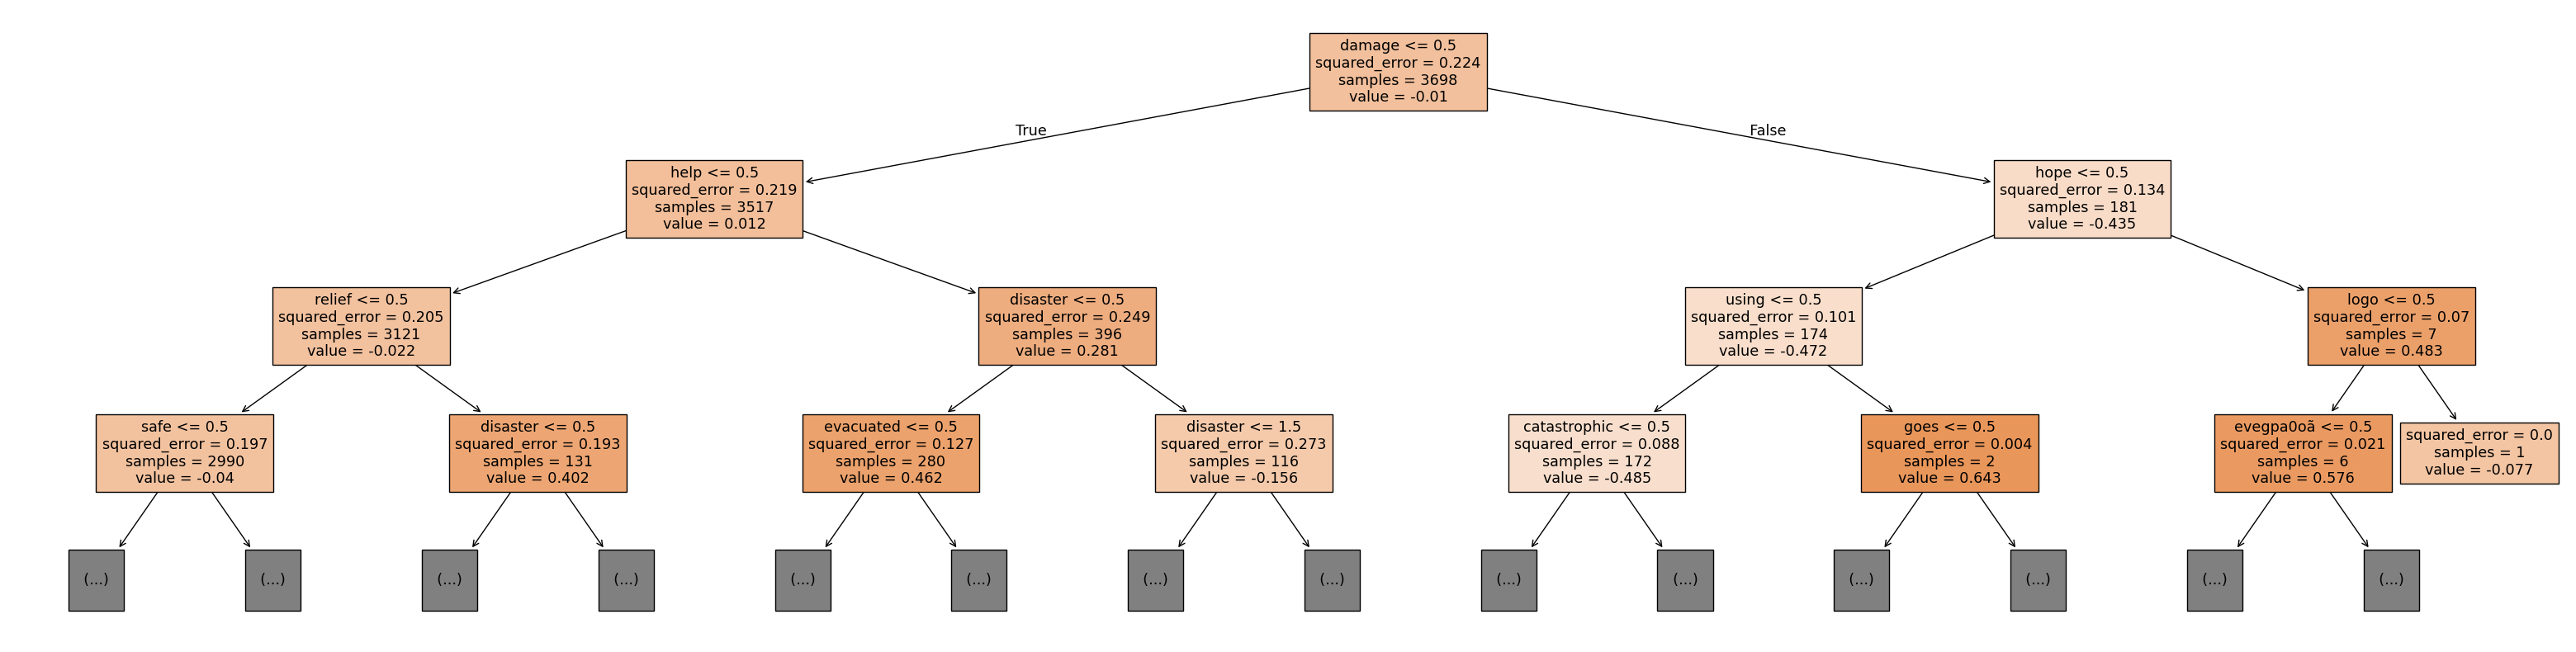

In [119]:
##### Figsize 40/10 is best to see it

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# use CountVectorizer to transform text to feature vectors (excluding stop words)
vectorizer = CountVectorizer(stop_words=combined_stop_words)

X = vectorizer.fit_transform(all_hurricanes['tweet'])
y = all_hurricanes['vader_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
 
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# predict
y_pred = regressor.predict(X_test)

# check model 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# lower Mean Squared Error (MSE) indicates a better model performance. A perfect model would have an MSE of 0.
plt.figure(figsize=(40, 10))
plot_tree(regressor, filled=True, feature_names=vectorizer.get_feature_names_out(), max_depth=3)
plt.show()


In [120]:
# Checking most often bigrams: 

vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=combined_stop_words)
X_bigrams = vectorizer_bigrams.fit_transform(negative_tweets['tweet'])

word_freq_bigrams = X_bigrams.sum(axis=0).A1
words_bigrams = vectorizer_bigrams.get_feature_names_out()

word_freq_dict_bigrams = dict(zip(words_bigrams, word_freq_bigrams))
sorted_word_freq_bigrams = sorted(word_freq_dict_bigrams.items(), key=lambda x: x[1], reverse=True)

sorted_word_freq_bigrams[:20]

[('death toll', 138),
 ('puerto rico', 131),
 ('disaster relief', 86),
 ('climate change', 60),
 ('collapsed crane', 60),
 ('holds rally', 60),
 ('rally night', 60),
 ('trump holds', 60),
 ('crane dangling', 59),
 ('people died', 59),
 ('dangling building', 57),
 ('firefighters look', 57),
 ('look collapsed', 57),
 ('time firefighters', 57),
 ('disaster response', 53),
 ('gulf coast', 49),
 ('building 8abqk4sc', 47),
 ('east coast', 43),
 ('firsthand devastation', 43),
 ('state local', 41)]

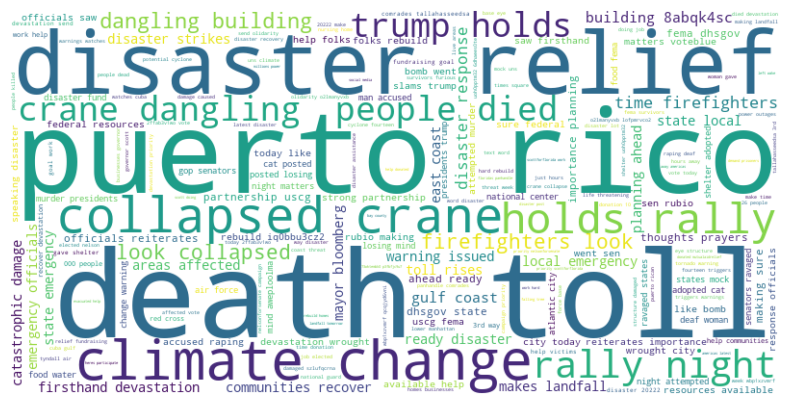

In [123]:
# Making cloud for bigrams for grouped by hurricane strenght negative tweets:

vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=combined_stop_words)
X_bigrams = vectorizer_bigrams.fit_transform(negative_tweets['tweet'])

word_freq_bigrams = X_bigrams.sum(axis=0).A1
words_bigrams = vectorizer_bigrams.get_feature_names_out()
word_freq_dict_bigrams = dict(zip(words_bigrams, word_freq_bigrams))


wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict_bigrams)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation='bilinear')
plt.axis('off')
plt.show()

Harvey ($125 billion)
Maria ($90 billion)
Sandy ($70 billion)
Irma ($50 billion)
Michael ($25 billion)
Florence ($24 billion)
Dorian ($7-10 billion)

I'm making breakdown:
---------------------
Very High Costs (group 3):

Harvey ($125 billion)
Maria ($90 billion)
Sandy ($70 billion)

High Costs (group 2):

Irma ($50 billion)
Michael ($25 billion)

Medium Costs (group 1): 

Florence ($24 billion)
Dorian ($7-10 billion)

Low Costs (group 0):

nothing yet

In [124]:
all_hurricost # this is df with all hurricanes, tweets + name

,hurricane name,tweet,index_column
0,Dorian,Everywhere else during a hurricane: lets get f...,0
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2
3,Dorian,absolutely gutted about what #HopeTown and the...,3
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4
...,...,...,...
12323,Michael,A Fighter Jet Flipped. Hangars Shredded. At Ty...,12323
12324,Michael,President Trump provides an update on the resp...,12324
12325,Michael,Just announced: The Walt Disney Company donate...,12325
12326,Michael,Take a second today to say a prayer for everyo...,12326


In [125]:
all_hurricost.head()

,hurricane name,tweet,index_column
0,Dorian,Everywhere else during a hurricane: lets get f...,0
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2
3,Dorian,absolutely gutted about what #HopeTown and the...,3
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4


In [126]:
damage_group = {
    "Maria": "group 3",
    "Irma": "group 2",
    "Dorian": "group 1",
    "Michael": "group 2",
    "Harvey": "group 3",
    "Florence": "group 1",
    "Sandy": "group 3"
}

all_hurricost['damage group'] = all_hurricost['hurricane name'].map(damage_group)
all_hurricost

,hurricane name,tweet,index_column,damage group
0,Dorian,Everywhere else during a hurricane: lets get f...,0,group 1
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1,group 1
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2,group 1
3,Dorian,absolutely gutted about what #HopeTown and the...,3,group 1
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4,group 1
...,...,...,...,...
12323,Michael,A Fighter Jet Flipped. Hangars Shredded. At Ty...,12323,group 2
12324,Michael,President Trump provides an update on the resp...,12324,group 2
12325,Michael,Just announced: The Walt Disney Company donate...,12325,group 2
12326,Michael,Take a second today to say a prayer for everyo...,12326,group 2


In [127]:
analyzer = SentimentIntensityAnalyzer()

# function to zanalyze based on VADER
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # result

# apply it to tweet text
all_hurricost['vader_score'] = all_hurricost['tweet'].apply(get_vader_sentiment)

In [128]:
all_hurricost.head()

,hurricane name,tweet,index_column,damage group,vader_score
0,Dorian,Everywhere else during a hurricane: lets get f...,0,group 1,0.0000
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1,group 1,0.4754
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2,group 1,-0.3818
3,Dorian,absolutely gutted about what #HopeTown and the...,3,group 1,-0.1779
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4,group 1,-0.2462


In [129]:
average_sentiment_by_group = all_hurricost.groupby('damage group')['vader_score'].mean()
average_sentiment_by_group

damage group
group 1    0.044372
group 2   -0.019991
group 3   -0.014357
Name: vader_score, dtype: float64

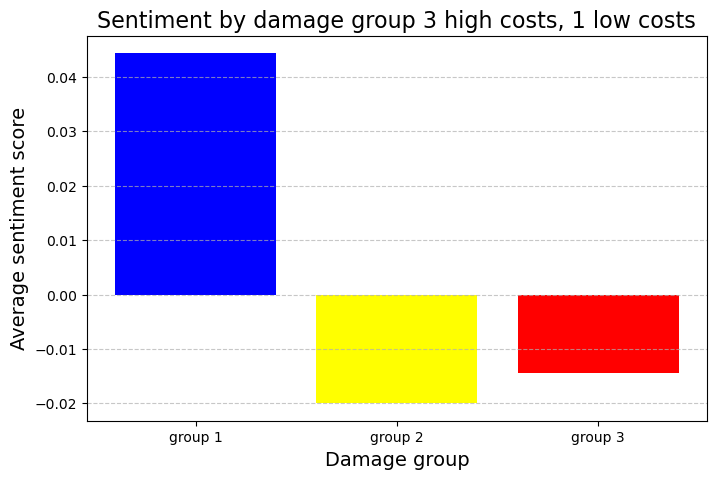

In [130]:
colors = ['blue', 'yellow', 'red']

plt.figure(figsize=(8, 5))
plt.bar(average_sentiment_by_group.index, average_sentiment_by_group, color=colors)


plt.title('Sentiment by damage group 3 high costs, 1 low costs', fontsize=16)
plt.xlabel('Damage group', fontsize=14)
plt.ylabel('Average sentiment score', fontsize=14)

# Adding grid for better visualization
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


Generating Word Cloud for group 1:


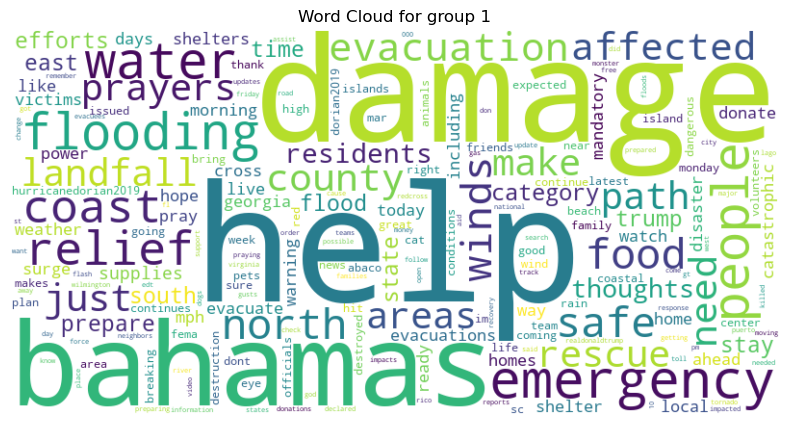


Generating Word Cloud for group 2:


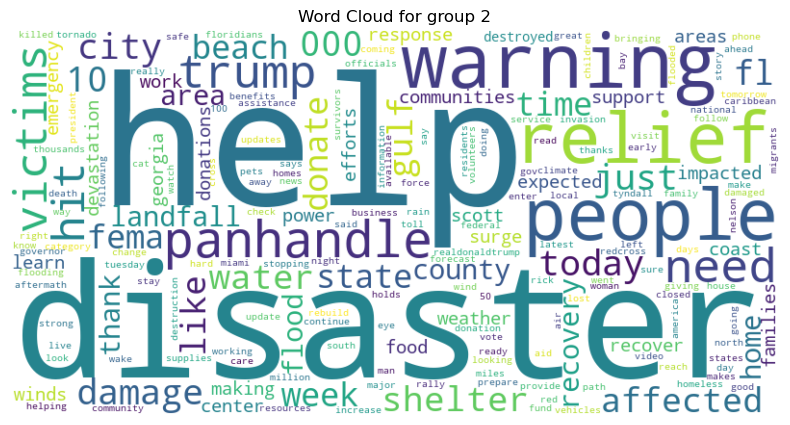


Generating Word Cloud for group 3:


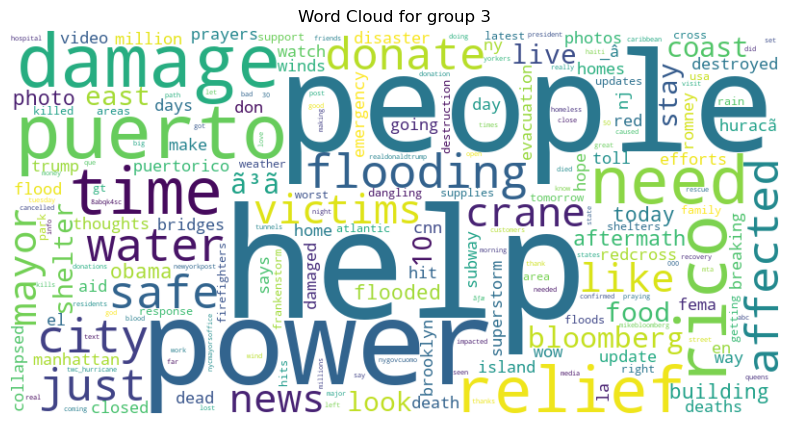

In [131]:
# generate 3 word clouds for each group: ( I was checking for a pattern how to do that for 3 of them in chat gpt )

ordered_groups_list = ['group 1', 'group 2', 'group 3']
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=combined_stop_words)

for group in ordered_groups_list:
    print(f"\nGenerating Word Cloud for {group}:")

    group_data_subset = all_hurricost[all_hurricost['damage group'] == group]
    
    unigram_matrix = unigram_vectorizer.fit_transform(group_data_subset['tweet'])
    
    word_frequency = unigram_matrix.sum(axis=0).A1
    unigram_features = unigram_vectorizer.get_feature_names_out()
    
    word_frequency_dict = dict(zip(unigram_features, word_frequency))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {group}")
    plt.show()

In [132]:
#### all_hurrifatal - df with all hurricanes but I will add labels based on fatalities ###

# Maria (~3,000 deaths)
# Sandy (~233 deaths)
# Irma (~134 deaths)
# Harvey (~107 deaths)
# Dorian (~74 deaths)
# Florence (~53 deaths)
# Michael (~43 deaths)

# Categorization Based on Fatalities:
# (g.3) The biggest number of fatalities : 1000+ fatalities (e.g. Maria, ~3000 deaths)
# (g.2) High number of fatalities: 200-1000 fatalities (e.g. Sandy, ~233 deaths; Irma, ~134 deaths)
# (g.1) Medium number of fatalities: 50-200 fatalities (e.g. Harvey, ~107 deaths; Dorian, ~74 deaths; Florence, ~53 deaths)
# (g.0) Low number of fatalities: Less than 50 fatalities (e.g. Michael, ~43 deaths)

In [133]:
all_hurrifatal.head()

,hurricane name,tweet,index_column
0,Dorian,Everywhere else during a hurricane: lets get f...,0
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2
3,Dorian,absolutely gutted about what #HopeTown and the...,3
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4


In [134]:
fatal_label = {
    "Maria": "g.3",
    "Irma": "g.2",
    "Dorian": "g.1",
    "Michael": "g.0",
    "Harvey": "g.1",
    "Florence": "g.1",
    "Sandy": "g.2"
}
all_hurrifatal['hurricane fatalities'] = all_hurrifatal['hurricane name'].map(fatal_label)
all_hurrifatal.head()

,hurricane name,tweet,index_column,hurricane fatalities
0,Dorian,Everywhere else during a hurricane: lets get f...,0,g.1
1,Dorian,Hurricane #Dorian is currently over the Abaco ...,1,g.1
2,Dorian,Terrible situation unfolding for the Bahamas. ...,2,g.1
3,Dorian,absolutely gutted about what #HopeTown and the...,3,g.1
4,Dorian,Happy Dorian Eve! Prepare for the worst!,4,g.1


In [151]:
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']    
all_hurrifatal['sentiment_score'] = all_hurrifatal['tweet'].apply(get_vader_sentiment)

sentiment_by_group = all_hurrifatal.groupby('hurricane fatalities')['sentiment_score'].mean()

sorted_sentiment_by_group = sentiment_by_group.sort_values()
sorted_sentiment_by_group

hurricane fatalities
g.2   -0.030879
g.3   -0.018669
g.0   -0.009517
g.1    0.042192
Name: sentiment_score, dtype: float64

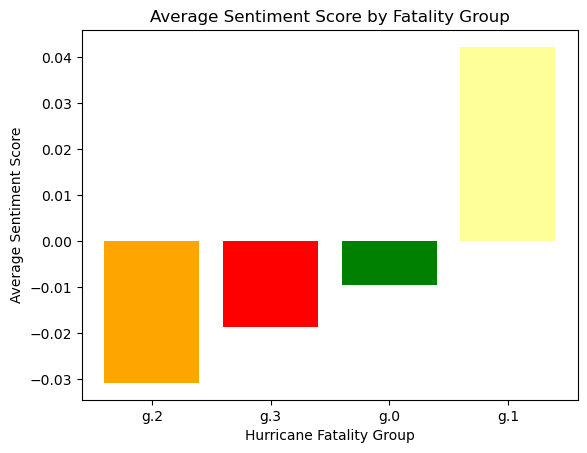

In [136]:
plt.bar(sorted_sentiment_by_group.index, sorted_sentiment_by_group, color=['orange', 'red', 'green', '#FFFF99'])

plt.title('Average Sentiment Score by Fatality Group')
plt.xlabel('Hurricane Fatality Group')
plt.ylabel('Average Sentiment Score')

plt.savefig('hurricane_sentiment_fatalities.png', format='png')

plt.show()

# Categorization Based on Fatalities:
# (g.3) The biggest number of fatalities : 1000+ fatalities (e.g. Maria, ~3000 deaths)
# (g.2) High number of fatalities: 200-1000 fatalities (e.g. Sandy, ~233 deaths; Irma, ~134 deaths)
# (g.1) Medium number of fatalities: 50-200 fatalities (e.g. Harvey, ~107 deaths; Dorian, ~74 deaths; Florence, ~53 deaths)
# (g.0) Low number of fatalities: Less than 50 fatalities (e.g. Michael, ~43 deaths)

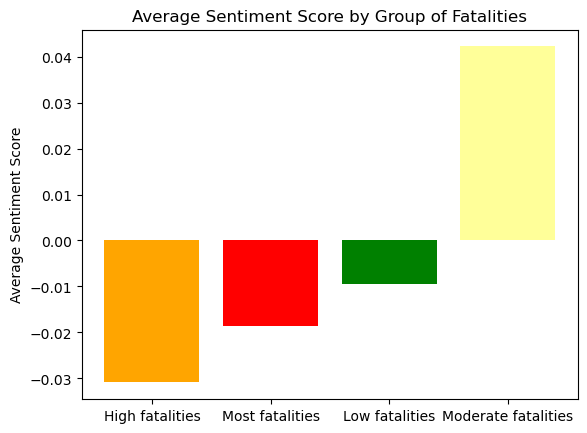

In [150]:
colors = ['orange', 'red', 'green', '#FFFF99']
labels = labels = ['High fatalities', 'Most fatalities', 'Low fatalities', 'Moderate fatalities']

plt.bar(sorted_sentiment_by_group.index, sorted_sentiment_by_group, color=colors)

plt.xticks(sorted_sentiment_by_group.index, labels)

plt.title('Average Sentiment Score by Group of Fatalities')
plt.ylabel('Average Sentiment Score')

plt.savefig('hurricane_sentiment_fatalities_categorized_bar.png', format='png')

plt.show()

In [137]:
session.close()